In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

from wotan import flatten
from wotan import transit_mask

from astropy.io import fits
from astropy.wcs import WCS

%matplotlib widget

In [2]:
sector49_tpf = '../TESS/sector49_tp.fits'
sector49_lcf = '../TESS/sector49_lc.fits'

sector50_tpf = '../TESS/sector50_tp.fits'
sector50_lcf = '../TESS/sector50_lc.fits'

sector76_tpf = '../TESS/sector76_tp.fits'
sector76_lcf = '../TESS/sector76_lc.fits'

sector23_tpf = '../TESS/sector23_tp.fits'
sector23_lcf = '../TESS/sector23_lc.fits'

lcf23_hdu = fits.open(sector23_lcf)
lcf49_hdu = fits.open(sector49_lcf)
lcf50_hdu = fits.open(sector50_lcf)
lcf76_hdu = fits.open(sector76_lcf)

In [3]:
from TESS_LC_Class import Selection
from TESS_LC_Class import Filtering

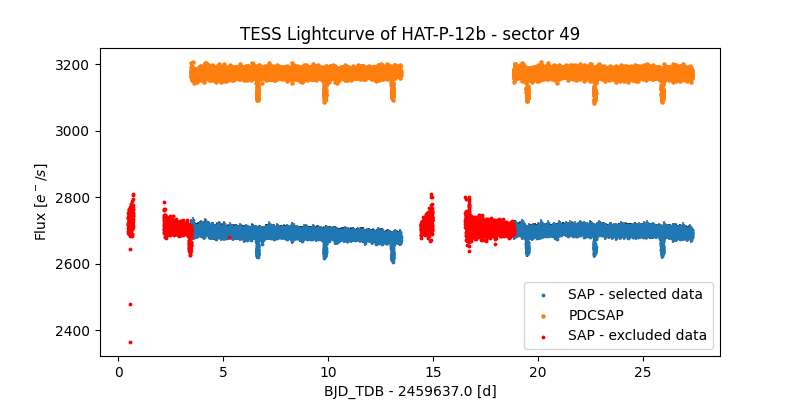

In [4]:
selection_s49 = Selection(lcf49_hdu, 49)

plt.figure(figsize=(8, 4))
sector49_dictionary = selection_s49.selection()

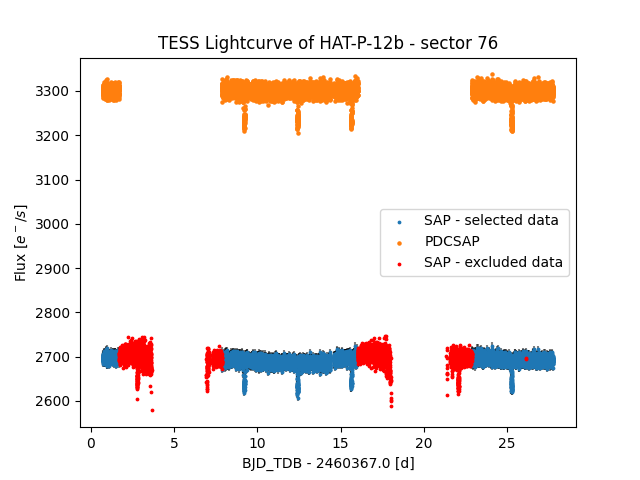

In [5]:
selection_s76 = Selection(lcf76_hdu, 76)

plt.figure()
sector76_dictionary = selection_s76.selection()

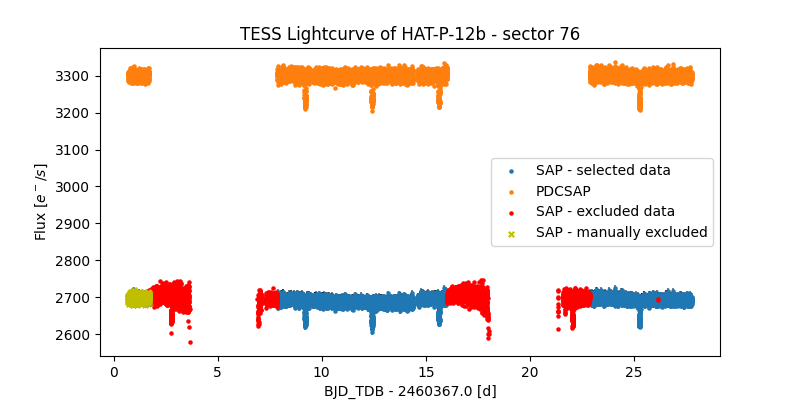

In [6]:
plt.figure(figsize=(8, 4))
sector76_dictionary = selection_s76.manual_selection(2460369.0)
#plt.savefig('./Plots/TESS_LC_selection76', dpi=500)

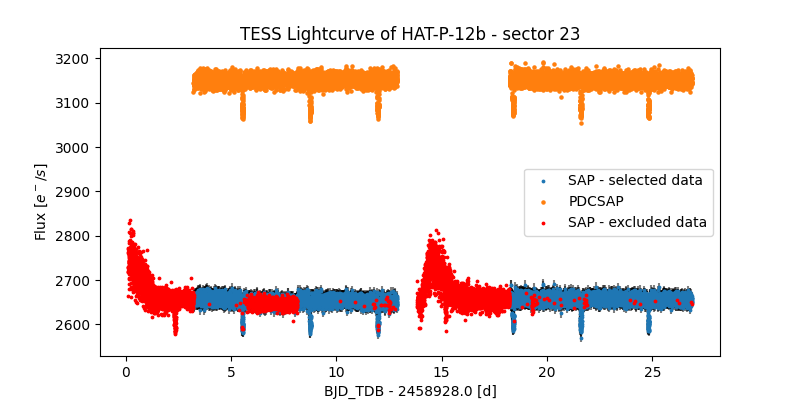

In [7]:
selection_s23 = Selection(lcf23_hdu, 23)

plt.figure(figsize=(8, 4))
sector23_dictionary = selection_s23.selection()

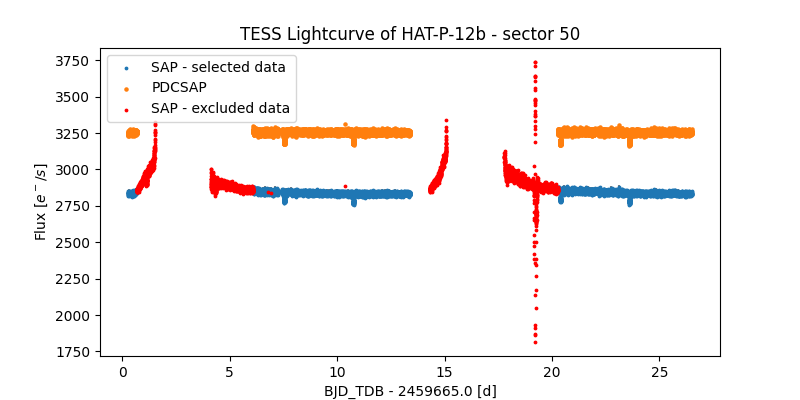

In [8]:
selection_s50 = Selection(lcf50_hdu, 50)

plt.figure(figsize=(8, 4))
sector50_dictionary = selection_s50.selection()

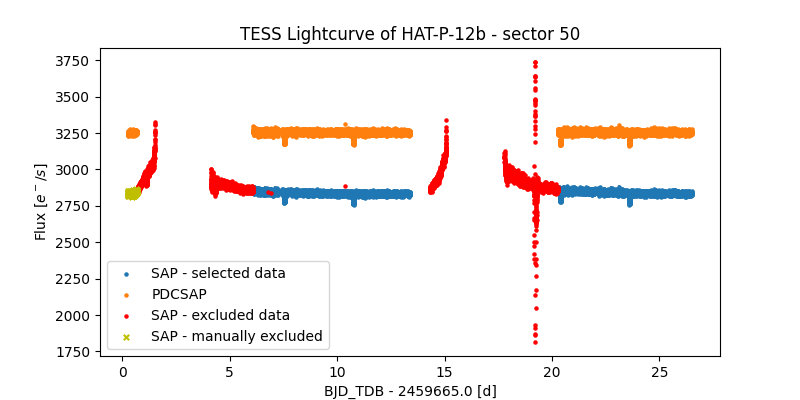

In [9]:
plt.figure(figsize=(8, 4))
sector50_dictionary = selection_s50.manual_selection(2459665.7)

In [10]:
sector76_hspline = Filtering()
sector76_hspline.filtering(sector76_dictionary, window=1., break_tol=0.5, method='hspline', duration_factor=2)
print()
sector76_bw = Filtering()
sector76_bw.filtering(sector76_dictionary, window=1.5, break_tol=0.5, method='biweight', duration_factor=2)

This is worth, give it a look!
Median flux error (SAP) =  0.002643
STD with mask (SAP) =  0.002661
STD without mask (SAP) =  0.002665
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002646
STD with mask (PDCSAP) =  0.002624
STD without mask (PDCSAP) =  0.002628

This is worth, give it a look!
Median flux error (SAP) =  0.002642
STD with mask (SAP) =  0.002655
STD without mask (SAP) =  0.002654
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002646
STD with mask (PDCSAP) =  0.002621
STD without mask (PDCSAP) =  0.002620


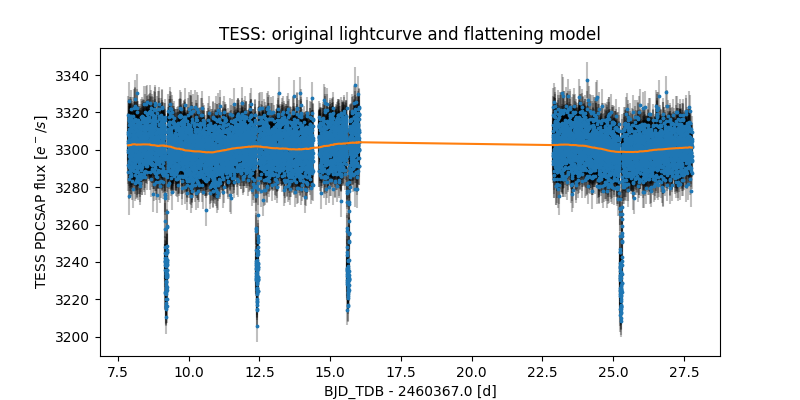

In [11]:
plt.figure(figsize=(8, 4))

mask = sector76_hspline.mask

sector76_bw.make_plot_model(pdc=True)

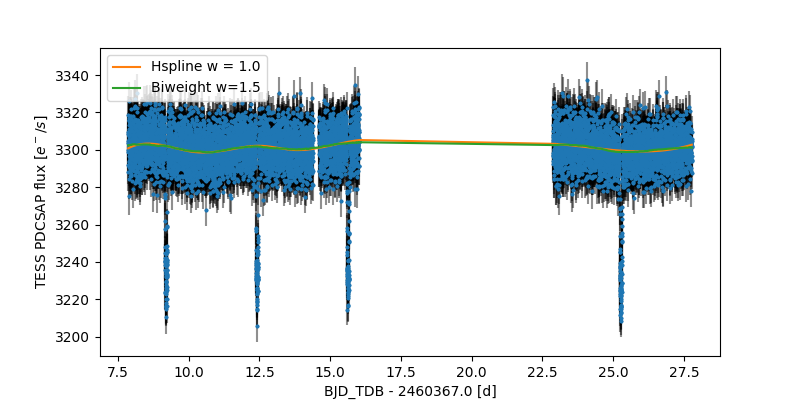

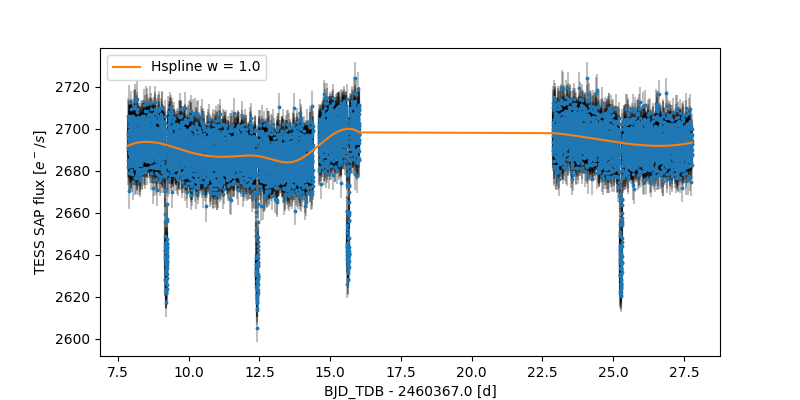

In [12]:
plt.figure(figsize=(8, 4))

sector76_hspline.make_plot_comparison_methods(True, 'Hspline w = 1.0', 'C1')
sector76_bw.make_plot_comparison_methods(True, 'Biweight w=1.5', 'C2')

plt.show()

plt.figure(figsize=(8, 4))

sector76_hspline.make_plot_comparison_methods(False, 'Hspline w = 1.0', 'C1')
plt.show()

In [13]:
sector49_hspline = Filtering()
sector49_hspline.filtering(sector49_dictionary, window=1., break_tol=0.5, method='hspline', duration_factor=2)
print()
sector49_bw = Filtering()
sector49_bw.filtering(sector49_dictionary, window=1.5, break_tol=0.5, method='biweight', duration_factor=2)

This is worth, give it a look!
Median flux error (SAP) =  0.002733
STD with mask (SAP) =  0.002675
STD without mask (SAP) =  0.002680
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002736
STD with mask (PDCSAP) =  0.002652
STD without mask (PDCSAP) =  0.002657

This is worth, give it a look!
Median flux error (SAP) =  0.002733
STD with mask (SAP) =  0.002682
STD without mask (SAP) =  0.002683
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002736
STD with mask (PDCSAP) =  0.002653
STD without mask (PDCSAP) =  0.002653


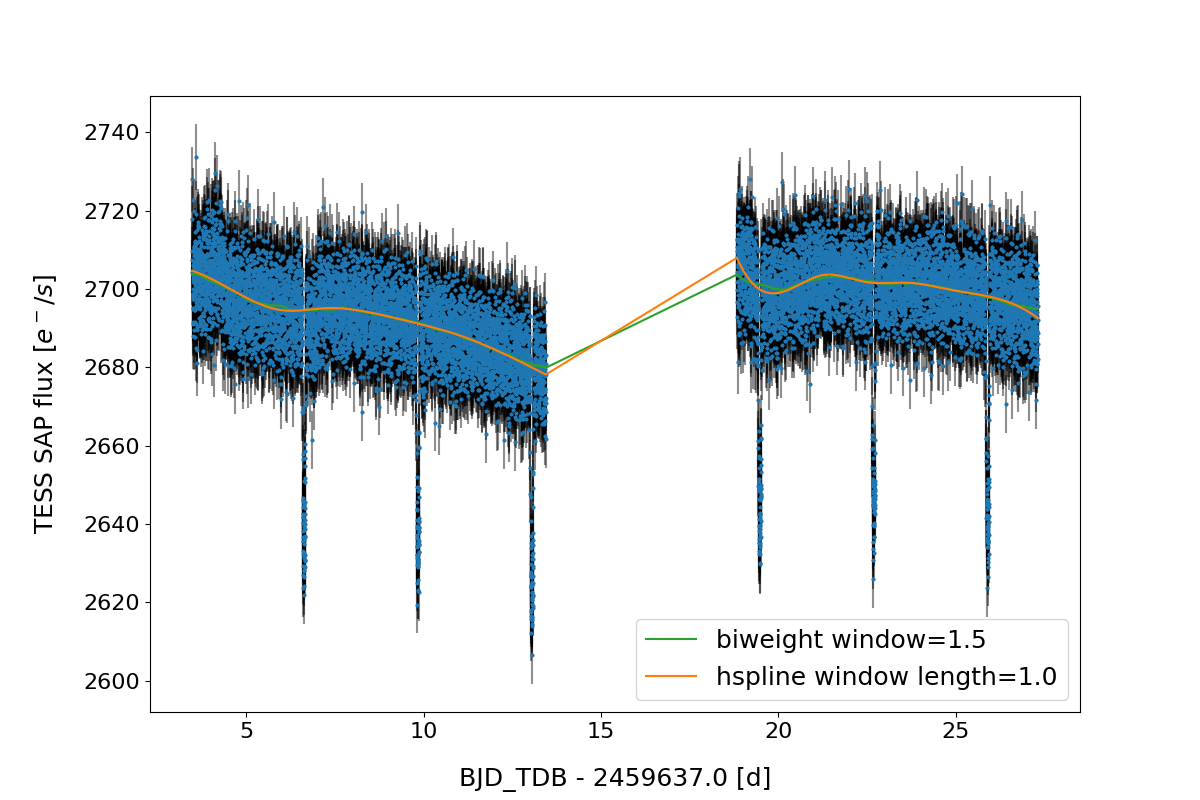

In [31]:
plt.figure(figsize=(12, 8))

mpl.rcParams['axes.labelsize'] = '18'
mpl.rcParams['axes.labelpad'] = '18'
mpl.rcParams['xtick.labelsize'] = '16'
mpl.rcParams['ytick.labelsize'] = '16'
mpl.rcParams['legend.fontsize'] = '18'

sector49_bw.make_plot_comparison_methods(pdc=False, method='biweight window=1.5', color='C2')
sector49_hspline.make_plot_comparison_methods(pdc=False, method='hspline window length=1.0', color='C1')
plt.savefig('./Plots/filtering.png', dpi=1000)
plt.show()

This is worth, give it a look!
Median flux error (SAP) =  0.003666
STD with mask (SAP) =  0.002944
STD without mask (SAP) =  0.002953
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.003692
STD with mask (PDCSAP) =  0.002874
STD without mask (PDCSAP) =  0.002882

This is worth, give it a look!
Median flux error (SAP) =  0.003666
STD with mask (SAP) =  0.002943
STD without mask (SAP) =  0.002944
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.003692
STD with mask (PDCSAP) =  0.002875
STD without mask (PDCSAP) =  0.002875


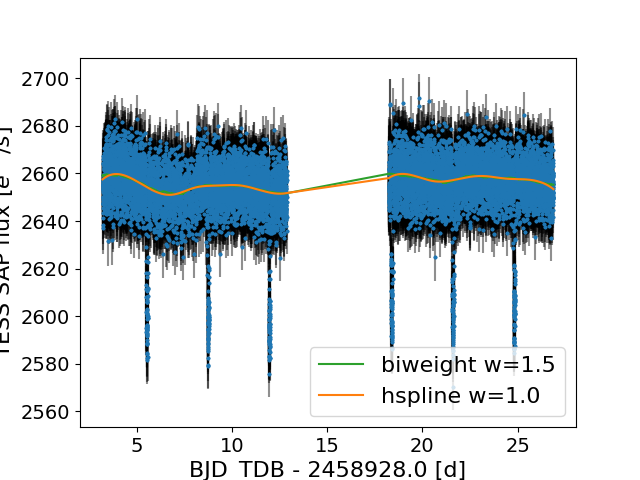

In [24]:
sector23_hspline = Filtering()
sector23_hspline.filtering(sector23_dictionary, window=1., break_tol=0.5, method='hspline', duration_factor=2)
print()
sector23_bw = Filtering()
sector23_bw.filtering(sector23_dictionary, window=1.5, break_tol=0.5, method='biweight', duration_factor=2)

plt.figure()
sector23_bw.make_plot_comparison_methods(False, 'biweight w=1.5', 'C2')
sector23_hspline.make_plot_comparison_methods(False, 'hspline w=1.0', 'C1')

In [25]:
sector50_hspline = Filtering()
sector50_hspline.filtering(sector50_dictionary, window=1., break_tol=0.5, method='hspline', duration_factor=2)
print()
sector50_bw = Filtering()
sector50_bw.filtering(sector50_dictionary, window=1.5, break_tol=0.5, method='biweight', duration_factor=2)

This is worth, give it a look!
Median flux error (SAP) =  0.002942
STD with mask (SAP) =  0.002917
STD without mask (SAP) =  0.002926
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002952
STD with mask (PDCSAP) =  0.002921
STD without mask (PDCSAP) =  0.002929

This is worth, give it a look!
Median flux error (SAP) =  0.002942
STD with mask (SAP) =  0.002926
STD without mask (SAP) =  0.002925
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002952
STD with mask (PDCSAP) =  0.002920
STD without mask (PDCSAP) =  0.002920


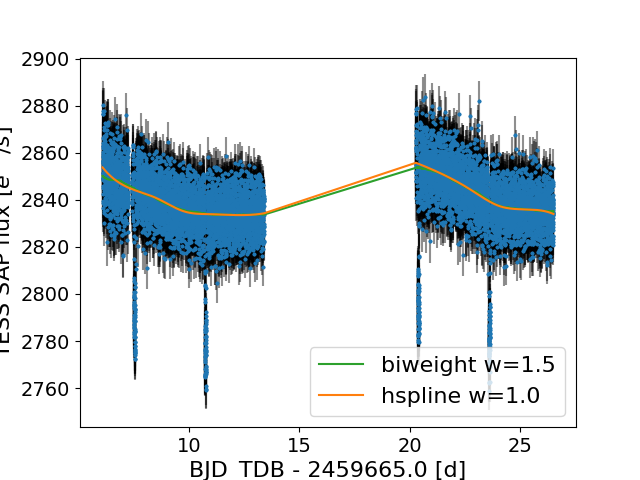

In [26]:
plt.figure()
sector50_bw.make_plot_comparison_methods(False, 'biweight w=1.5', 'C2')
sector50_hspline.make_plot_comparison_methods(False, 'hspline w=1.0', 'C1')

In [27]:
sector23_dictionary_hs = {
    'time': sector23_hspline.time,
    'flux': sector23_hspline.pdcsap_flux_flatten_masked,
    'flux_error': sector23_hspline.pdcsap_flux_err/sector23_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector23_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector23_hspline.sap_flux_err/sector23_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector23_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector23_bw.sap_flux_err/sector23_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector23_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector23_hspline.pdcsap_flux_err/sector23_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector23_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector23_bw.pdcsap_flux_err/sector23_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector23_dictionary_hs, open('../Results/TESS/sector23_flatten.p','wb'))

In [28]:
sector49_dictionary_hs = {
    'time': sector49_hspline.time,
    'flux': sector49_hspline.pdcsap_flux_flatten_masked,
    'flux_error': sector49_hspline.pdcsap_flux_err/sector49_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector49_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector49_hspline.sap_flux_err/sector49_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector49_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector49_bw.sap_flux_err/sector49_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector49_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector49_hspline.pdcsap_flux_err/sector49_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector49_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector49_bw.pdcsap_flux_err/sector49_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector49_dictionary_hs, open('../Results/TESS/sector49_flatten.p','wb'))

In [29]:
sector50_dictionary_hs = {
    'time': sector50_hspline.time,
    'flux': sector50_hspline.pdcsap_flux_flatten_masked,
    'flux_error': sector50_hspline.pdcsap_flux_err/sector50_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector50_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector50_hspline.sap_flux_err/sector50_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector50_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector50_bw.sap_flux_err/sector50_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector50_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector50_hspline.pdcsap_flux_err/sector50_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector50_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector50_bw.pdcsap_flux_err/sector50_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector50_dictionary_hs, open('../Results/TESS/sector50_flatten.p','wb'))

In [30]:
sector76_dictionary_hs = {
    'time': sector76_hspline.time,
    'flux': sector76_hspline.pdcsap_flux_flatten_masked,
    'flux_error': sector76_hspline.pdcsap_flux_err/sector76_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector76_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector76_hspline.sap_flux_err/sector76_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector76_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector76_bw.sap_flux_err/sector76_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector76_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector76_hspline.pdcsap_flux_err/sector76_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector76_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector76_hspline.pdcsap_flux_err/sector76_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector76_dictionary_hs, open('../Results/TESS/sector76_flatten.p','wb'))